<h1> <b>Testes para diversos grafos <b><h1>

In [19]:
#Import do código que habilita esses testes
import Algoritmo_do_Artigo as AA
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

<h3> Grafo de linha com 100 neurônios<h2>
<h6>Caso queira ver o gráfico com o tempo use plot = True<h6>

In [20]:
t = AA.Main(nx.path_graph(100), 1, plot=False)
print("Tempo de sobrevivencia: ", t)

Tempo de sobrevivencia:  9.174929188902256


<h3> Grafo de Erdos Renyi com probabilidade 0.03 <h3>

In [77]:
t = AA.Main(nx.erdos_renyi_graph(100, 0.05), 1, plot = False, t_up_plot=50000)
print("Tempo de sobrevivencia: ", t)

KeyboardInterrupt: 

<h3>Ligaremos dois Erdos-Renyi agora<h3>

In [21]:
G1 = nx.erdos_renyi_graph(20, 0.4, directed=True)
G2 = nx.erdos_renyi_graph(20, 0.4, directed=True)

print("Matriz 1:\n", nx.to_numpy_array(G1, dtype=int))
print("Matriz 2:\n", nx.to_numpy_array(G2, dtype=int))

Matriz 1:
 [[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0]
 [0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0]
 [0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0]
 [1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0]
 [0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1]
 [1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1]
 [0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0]
 [1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0]]
Matriz 2:
 [[0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1]
 [1 1 0 0 1 0 0 0 0 0 0 1 1 1 0

In [22]:
#Chamando os nós de outros números para evitar sobreposição

mapping = {node: node + len(G1) for node in G2.nodes()}
print(mapping)
G2 = nx.relabel_nodes(G2, mapping)
print(list(G2.nodes()))

{0: 20, 1: 21, 2: 22, 3: 23, 4: 24, 5: 25, 6: 26, 7: 27, 8: 28, 9: 29, 10: 30, 11: 31, 12: 32, 13: 33, 14: 34, 15: 35, 16: 36, 17: 37, 18: 38, 19: 39}
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [23]:
#Adiciona todas as linhas da matriz
G = nx.DiGraph()
G.add_nodes_from(G1.nodes())
G.add_nodes_from(G2.nodes())
G.add_edges_from(G1.edges())
G.add_edges_from(G2.edges())

# Conectando a 0 (primeira de G1) com N (primeira de G2)
G.add_edge(0, len(G1)) 

print("Matriz nova:\n", nx.to_numpy_array(G, dtype=int))
print("dim:\n", np.shape(nx.to_numpy_array(G, dtype=int)))

Matriz nova:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
dim:
 (40, 40)


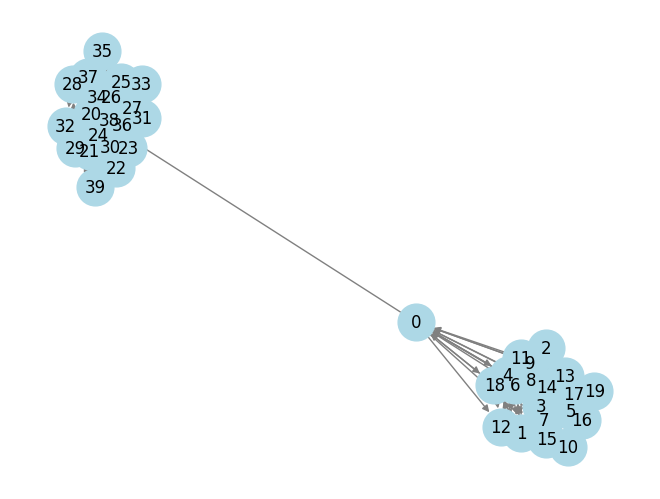

[4, 12, 13, 14, 15, 16, 18, 20]
[3, 7, 8, 9, 10, 11, 15]


In [24]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=12)
plt.show()
print(list(G.neighbors(0)))
print(list(G.neighbors(13)))

Repare que o G1 sempre terá os pontos iniciais {0, 1, 2, ..., N-1}
e G2 o resto: {N, N+1, ..., 2N-1}

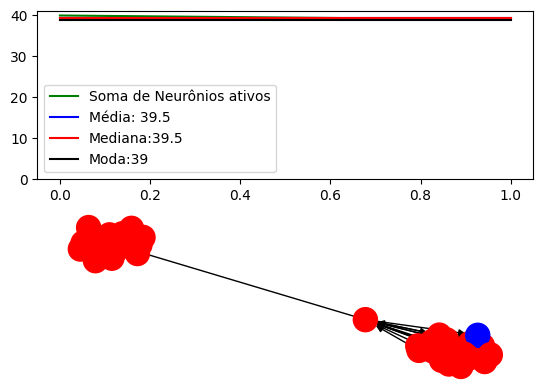

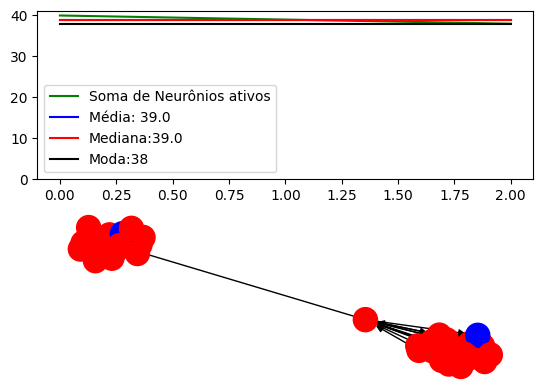

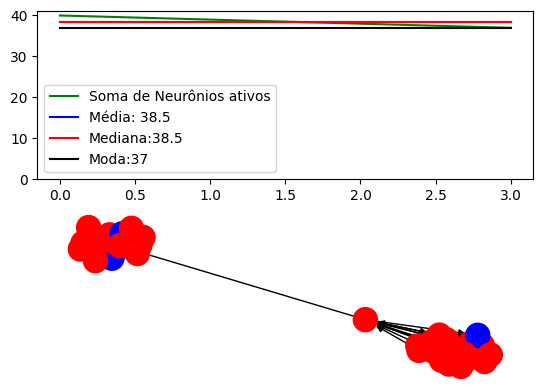

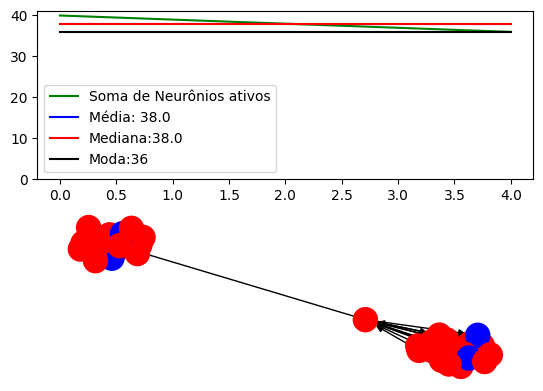

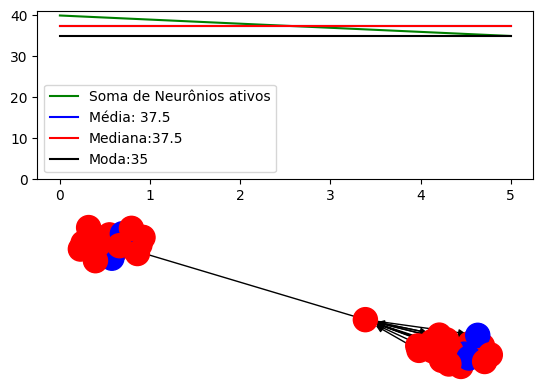

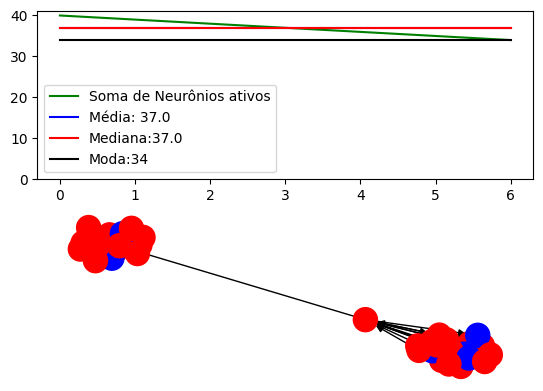

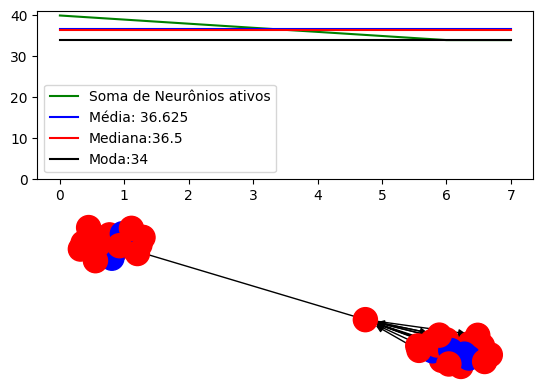

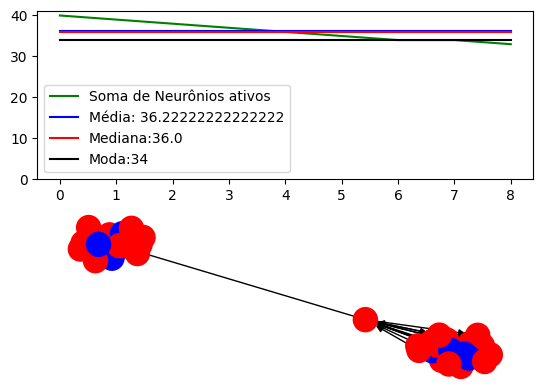

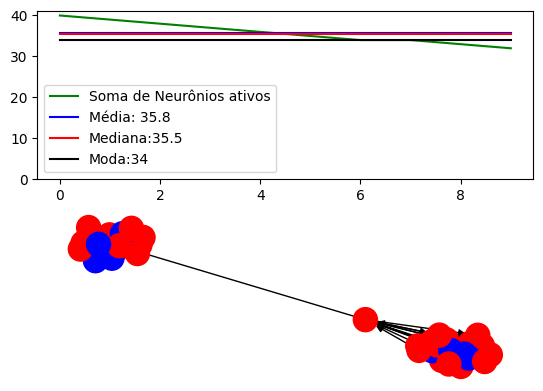

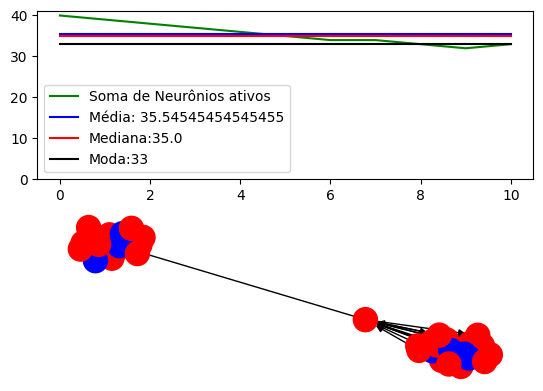

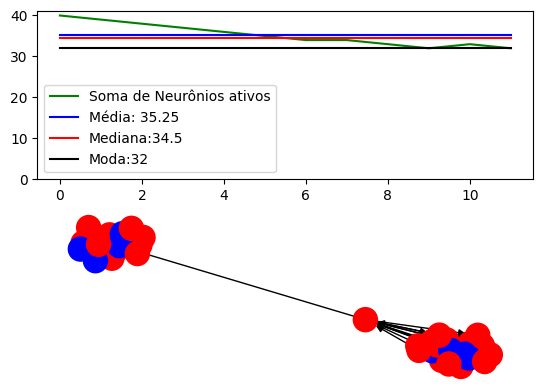

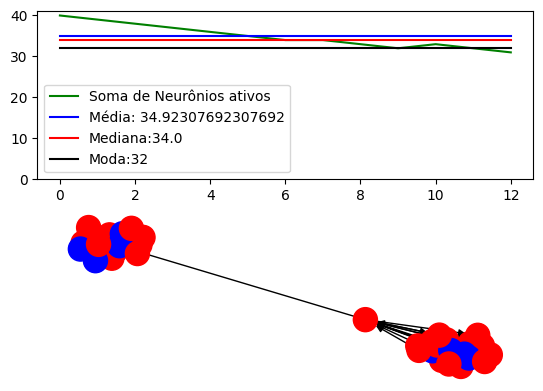

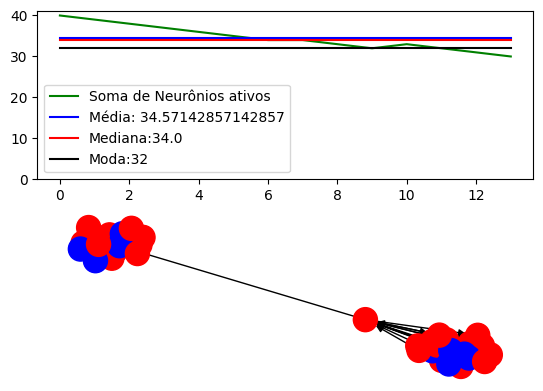

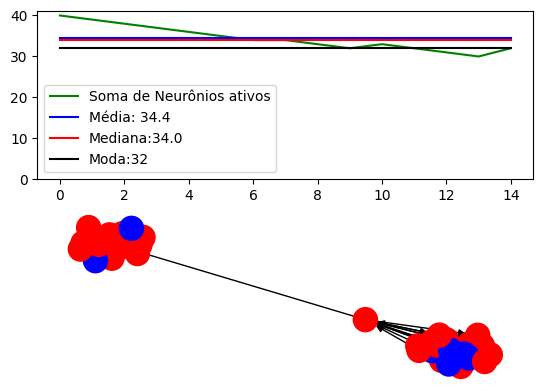

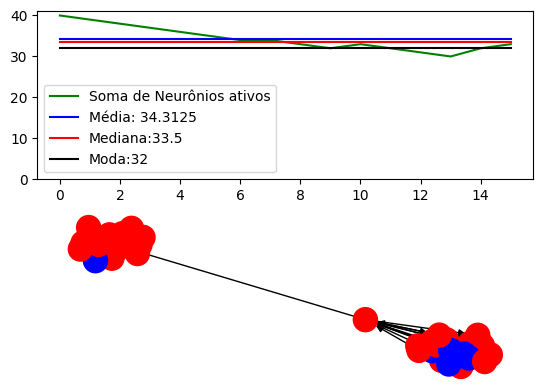

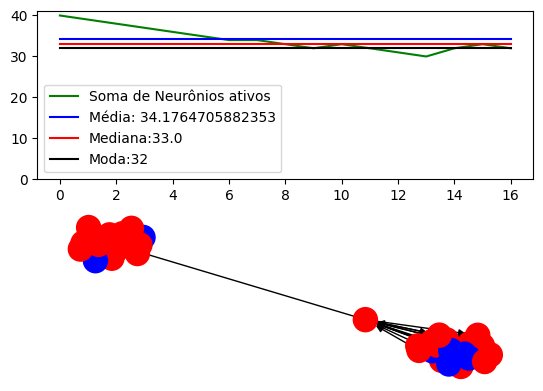

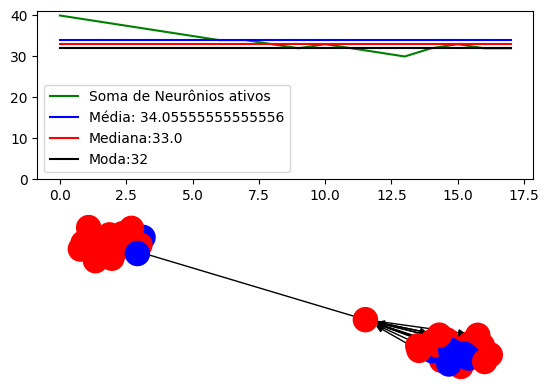

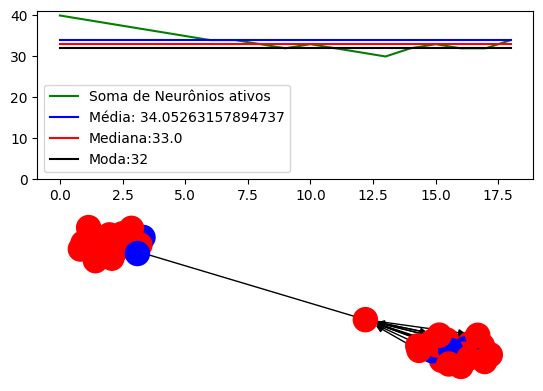

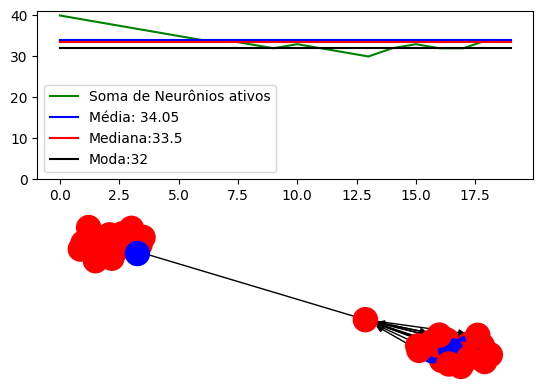

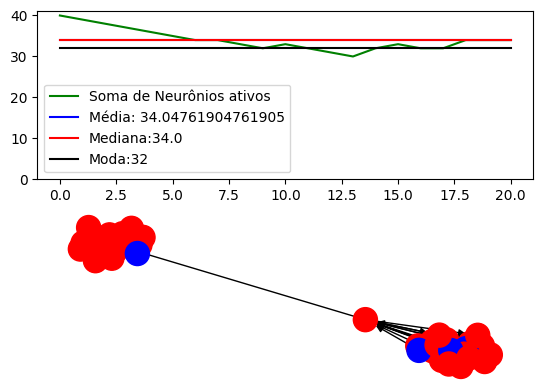

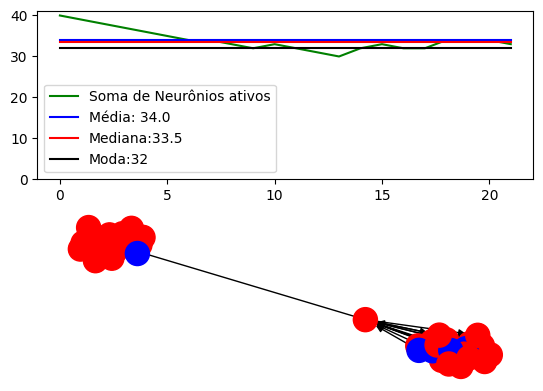

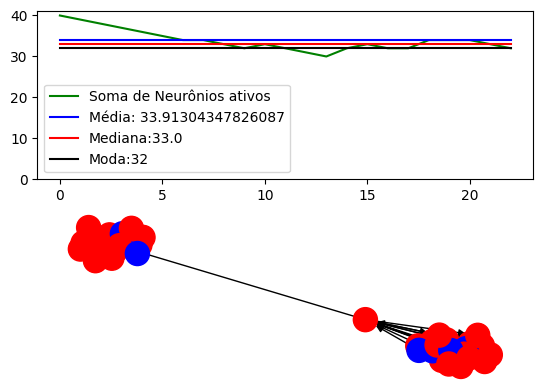

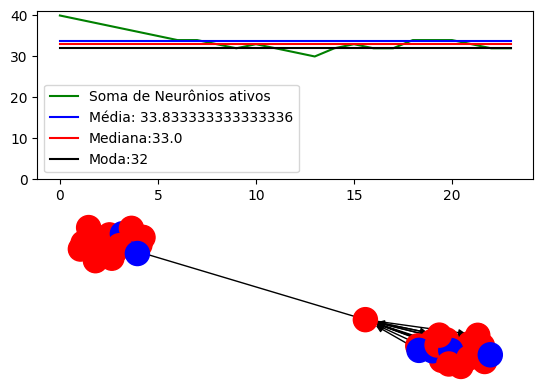

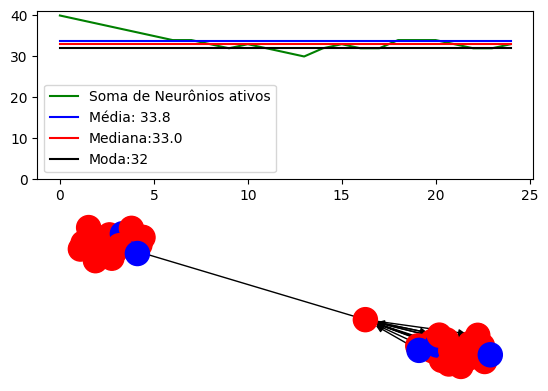

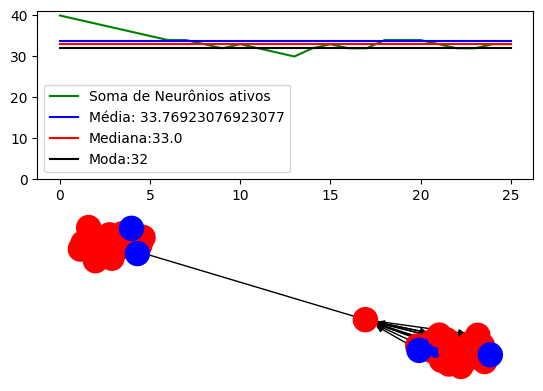

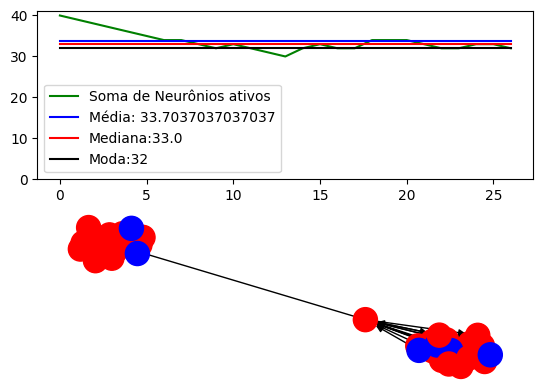

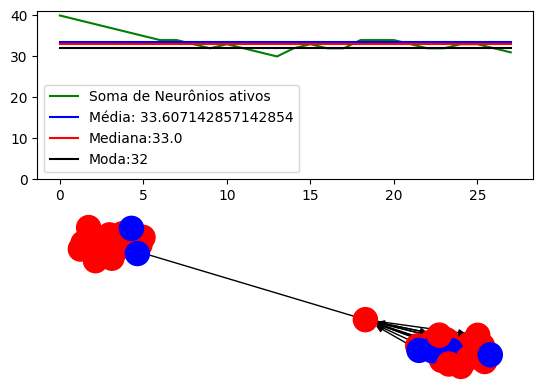

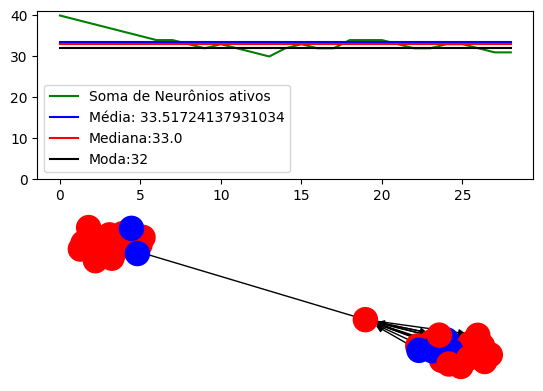

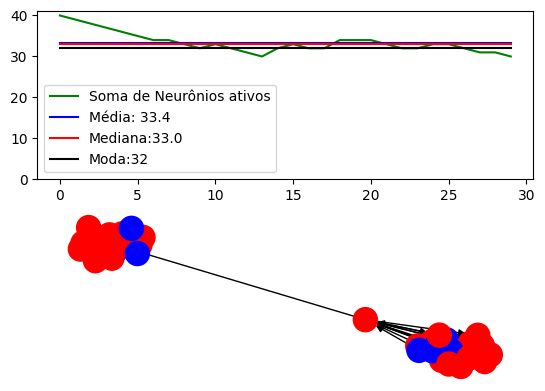

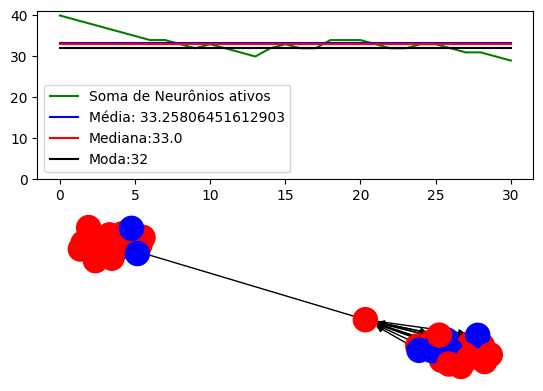

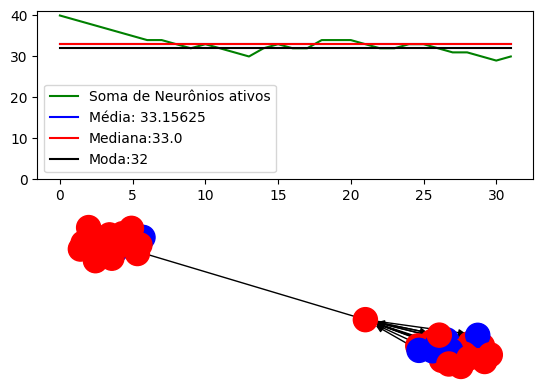

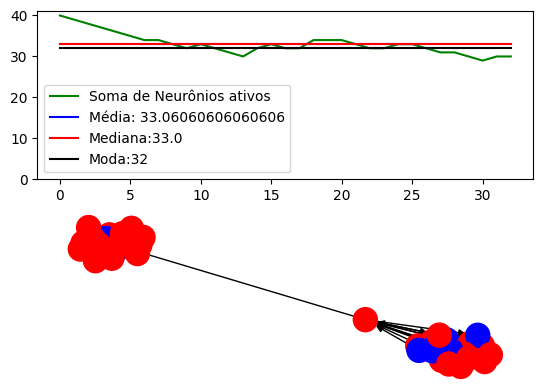

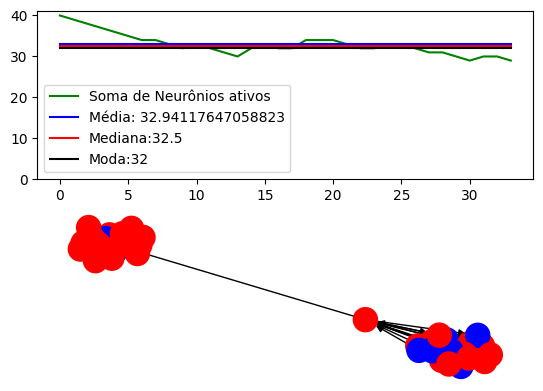

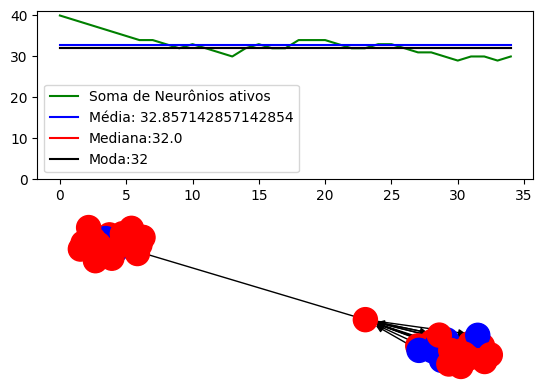

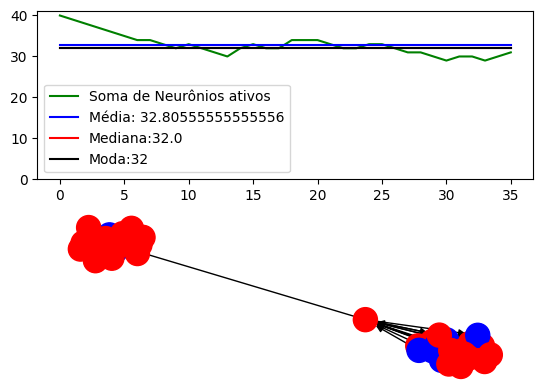

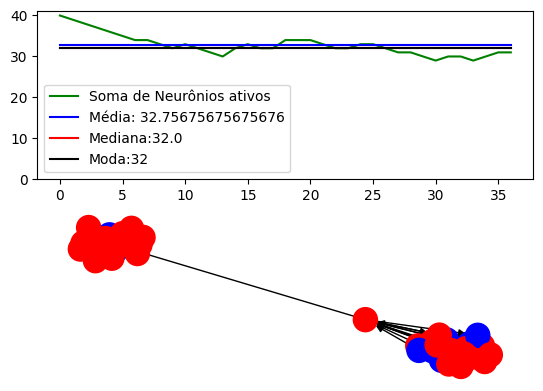

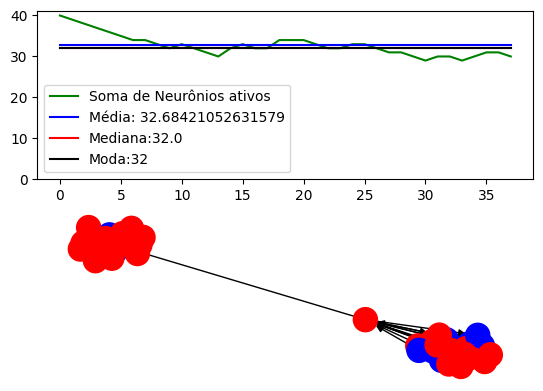

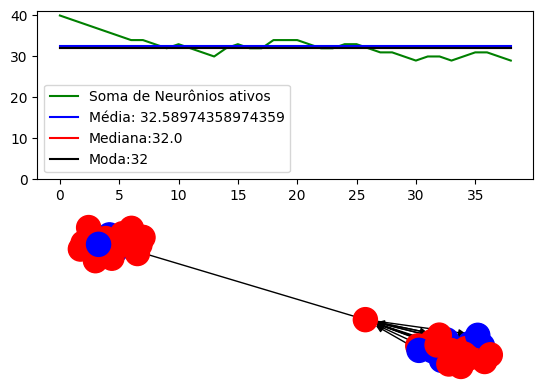

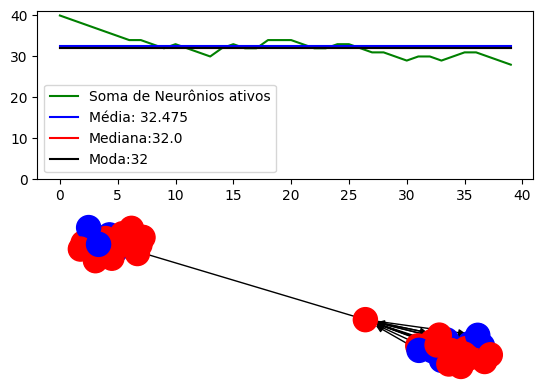

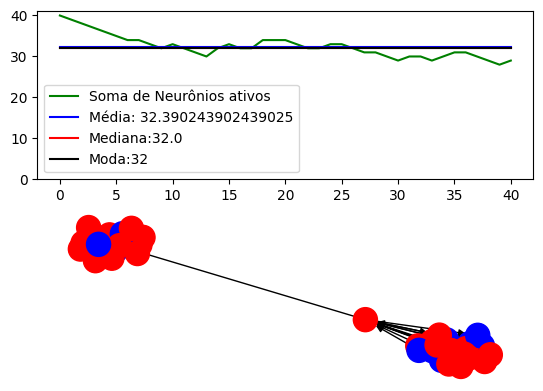

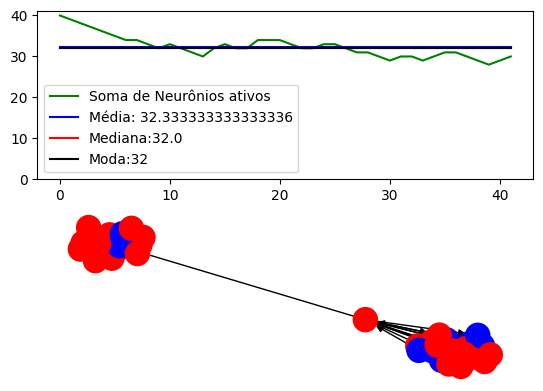

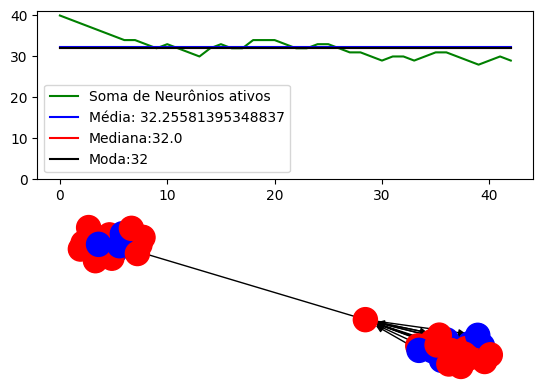

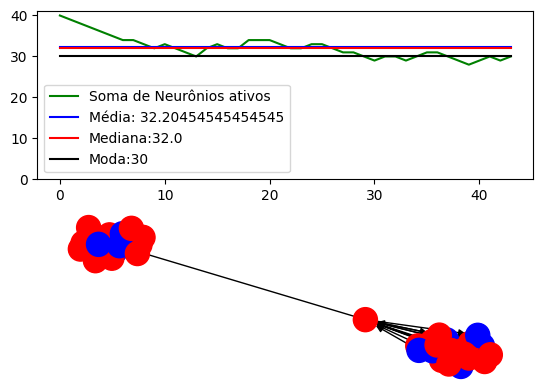

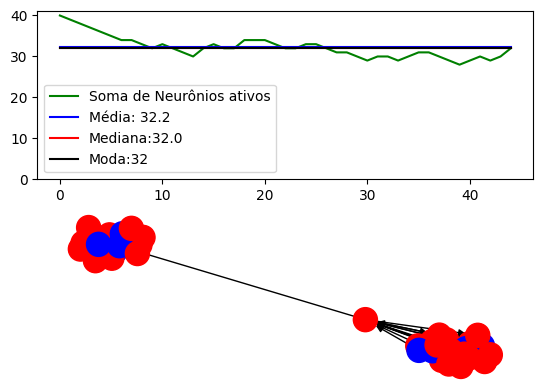

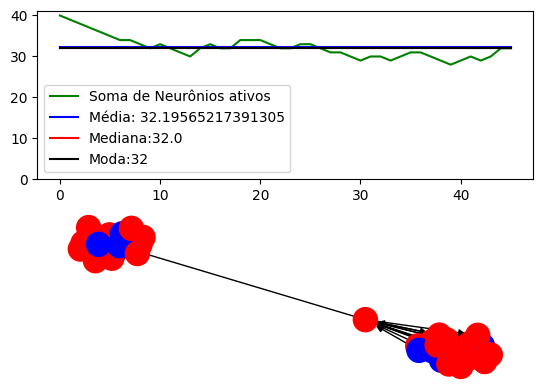

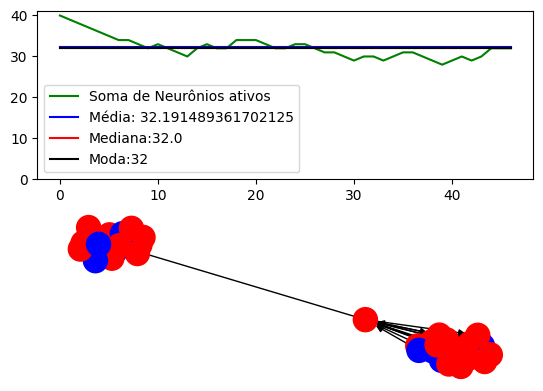

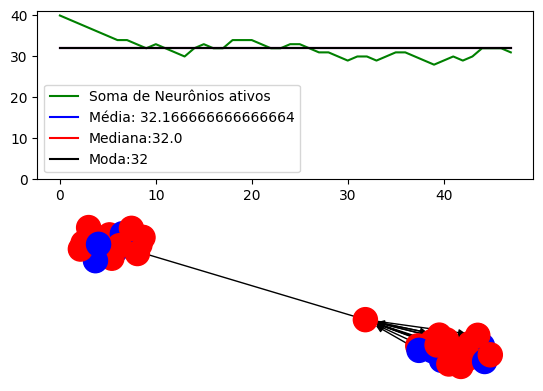

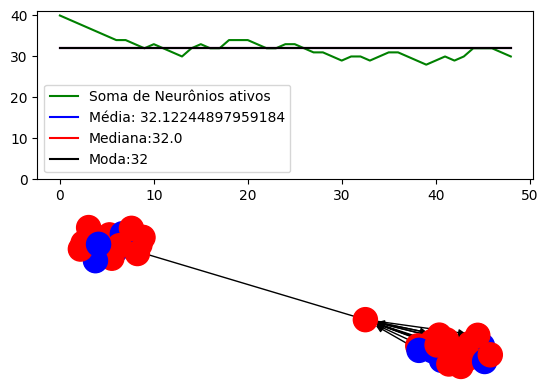

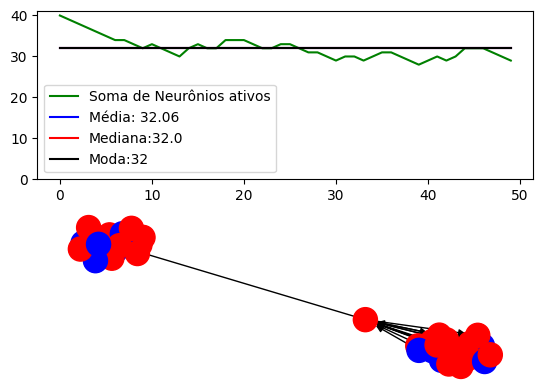

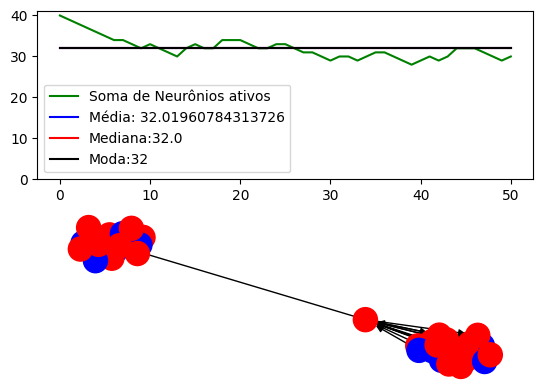

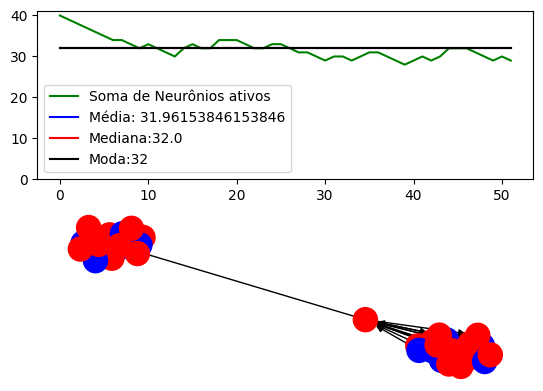

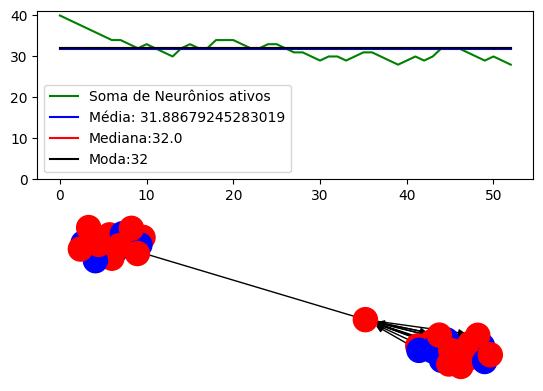

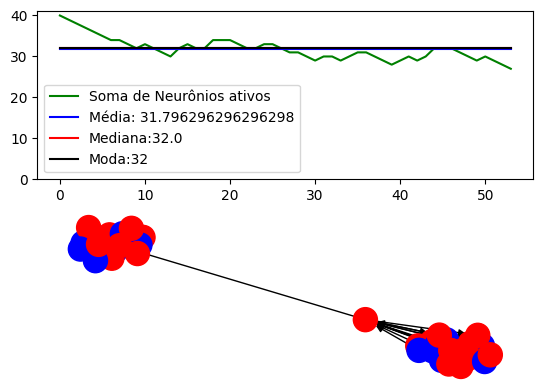

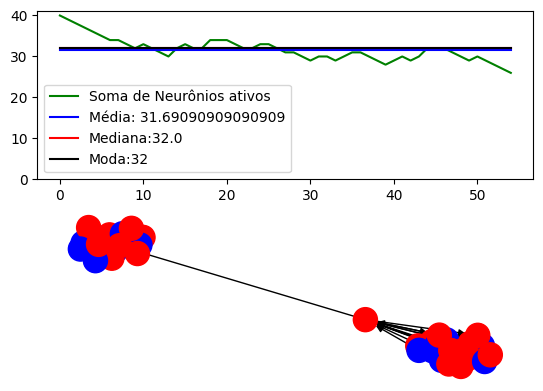

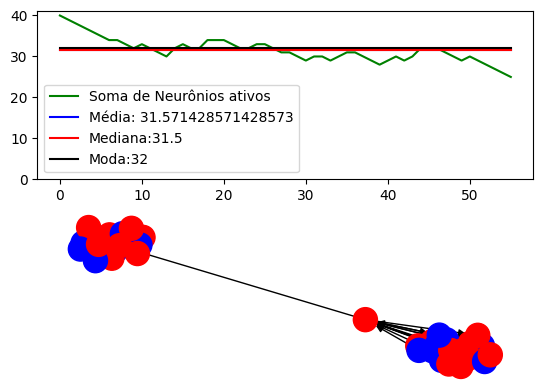

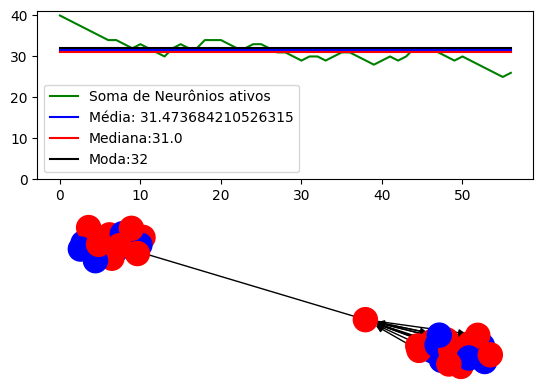

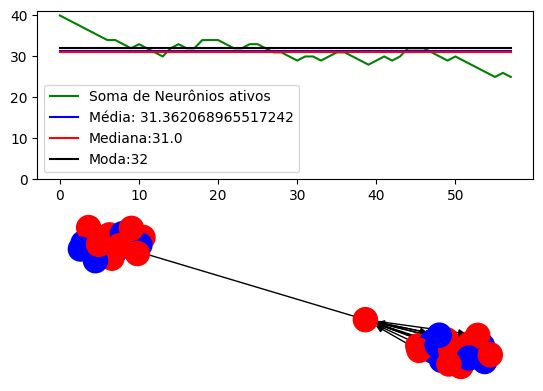

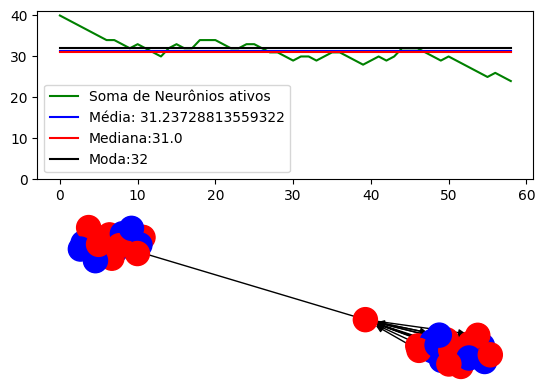

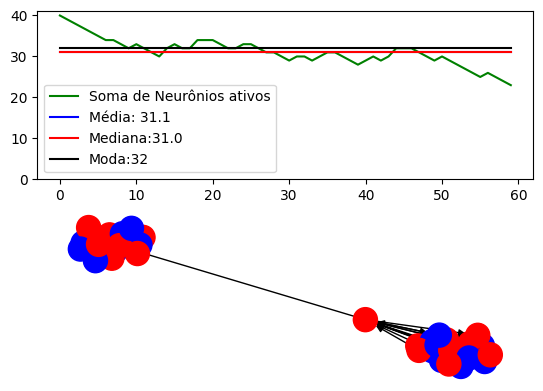

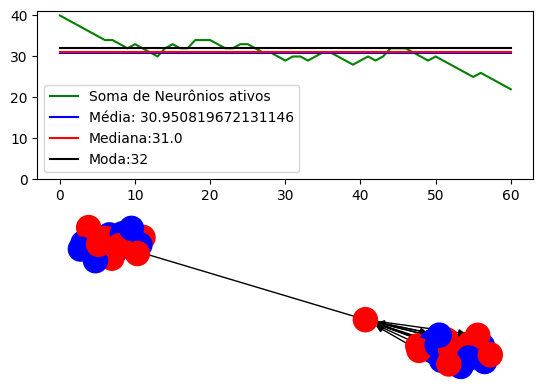

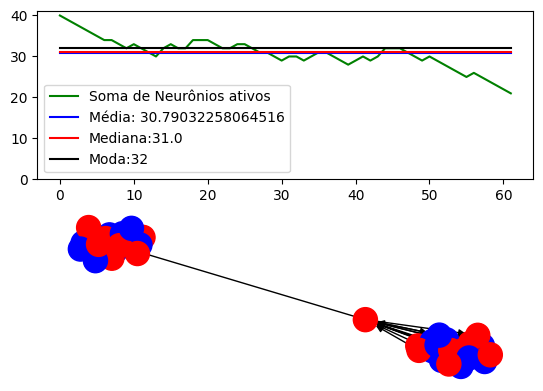

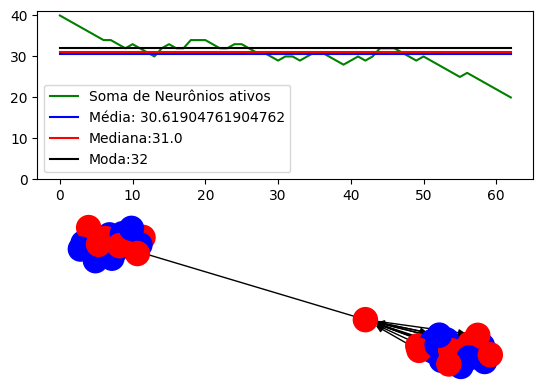

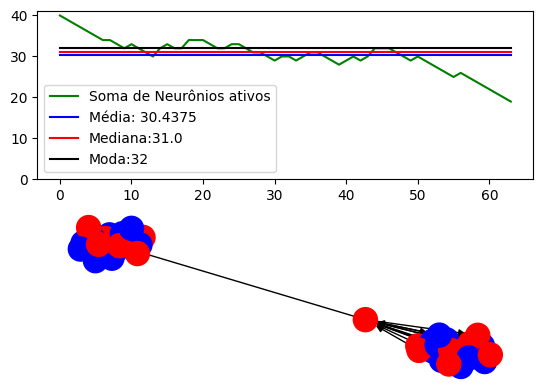

In [ ]:
AA.Main(G, 1, plot=True, t_up_plot=1)